--sys.version-
3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

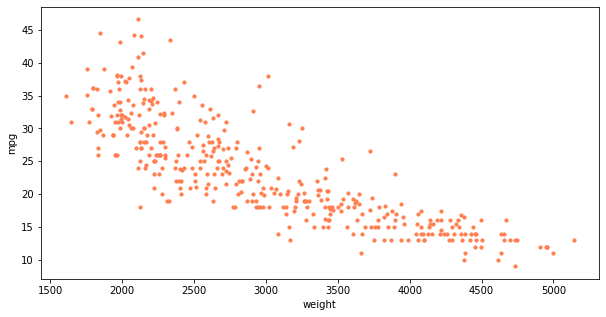

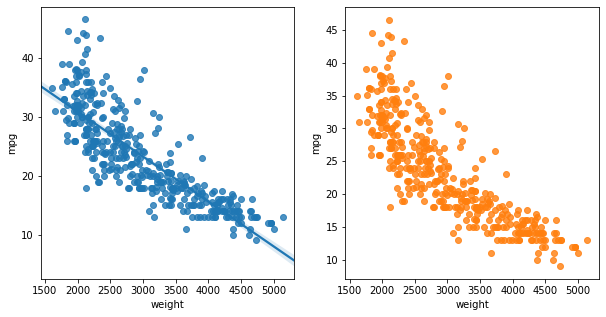

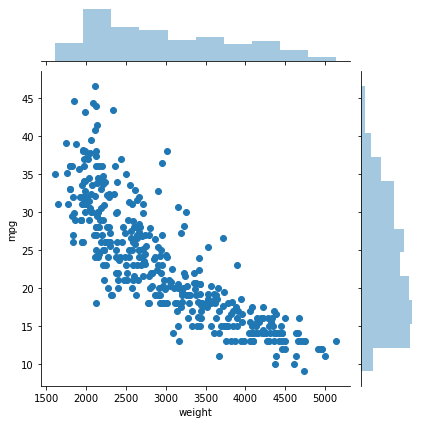

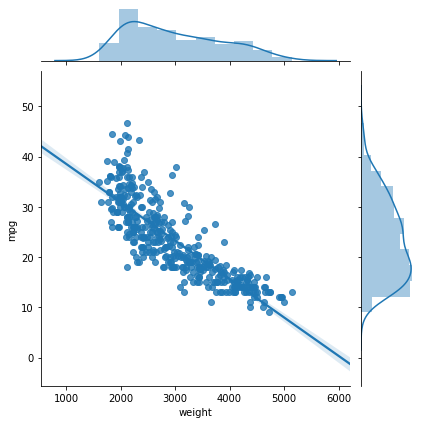

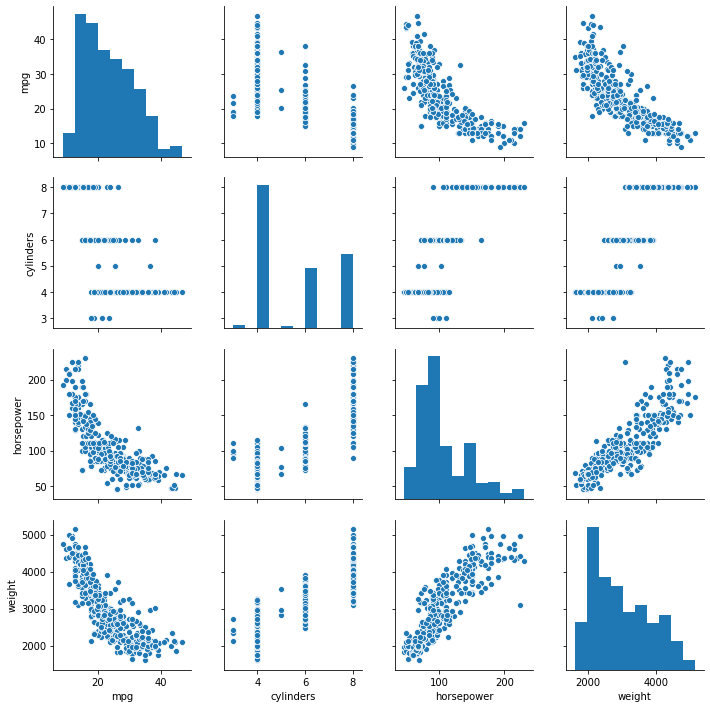

train data 개수:  274
test data 개수:  118
0.6822458558299325


기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




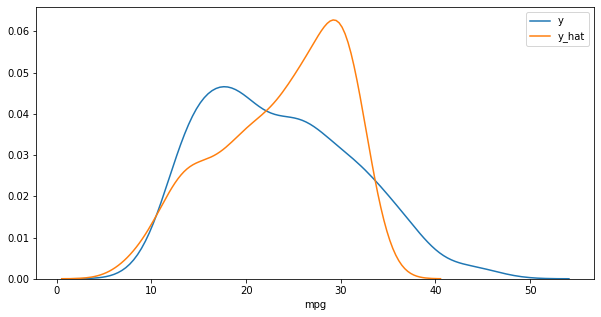

In [3]:
# -*- coding: utf-8 -*-

# 기본 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('c:\\ddata\\auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# 데이터 살펴보기
print(df.head())
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())
print('\n')


'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')


'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())
print('\n')

# 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',
         c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  # 회귀선 미표시
plt.show()
plt.close()

# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()
plt.close()

# 설명 : 독립변수들간의 상관관계를 시각화 하는 그래프
# horsepower와 weight이 mpg와 음의 상관관계를 가짐

'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['weight']]  # 독립 변수 X
y = ndf['mpg']  # 종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X,  # 독립 변수
                                                    y,  # 종속 변수
                                                    test_size=0.3,  # 검증 30%
                                                    random_state=10)  # 랜덤 추출 값

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))


'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [13]:
weight=[ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88,64, 56, 56  ]



tall = [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ] 



dict_data = { 'weight' : [ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88, 64, 56, 56  ],

                  'tall' : [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]   }



df = pd.DataFrame(dict_data)

print (df)
w = pd.DataFrame(weight)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(w,               #독립 변수 
                                                    tall,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=33) #랜덤 추출 값 
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)

print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

    weight  tall
0       72   176
1       72   172
2       70   182
3       43   160
4       48   163
5       54   165
6       51   168
7       52   163
8       73   182
9       45   148
10      60   170
11      62   166
12      64   172
13      47   169
14      51   163
15      74   170
16      88   182
17      64   174
18      56   164
19      56   160
0.5949164423295387


기울기 a:  [0.56679569]


y절편 b 134.24730620357778




훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


0.7087009262975481




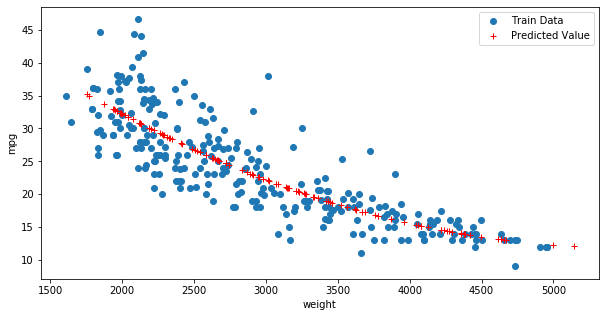

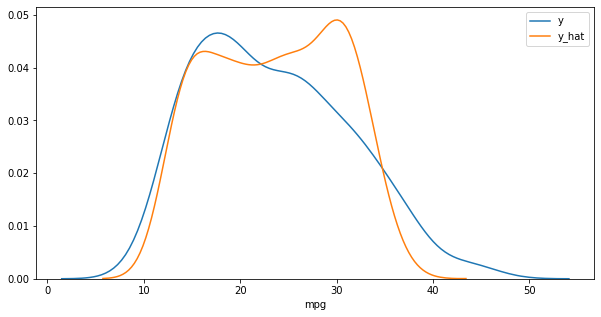

In [14]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('c:\\ddata\\auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')


'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()


In [15]:
weight=[ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88,64, 56, 56  ]



tall = [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ] 



dict_data = { 'weight' : [ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88, 64, 56, 56  ],

                  'tall' : [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]   }



df = pd.DataFrame(dict_data)

print (df)
w = pd.DataFrame(weight)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(w,               #독립 변수 
                                                    tall,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=33) #랜덤 추출 값 



# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')
# from sklearn.linear_model import LinearRegression

# # 단순회귀분석 모형 객체 생성
# lr = LinearRegression()   

# # train data를 가지고 모형 학습
# lr.fit(X_train, y_train)

# # 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# r_square = lr.score(X_test, y_test)

# print(r_square)
# print('\n')

# # 회귀식의 기울기
# print('기울기 a: ', lr.coef_)
# print('\n')

# # 회귀식의 y절편
# print('y절편 b', lr.intercept_)
# print('\n')

    weight  tall
0       72   176
1       72   172
2       70   182
3       43   160
4       48   163
5       54   165
6       51   168
7       52   163
8       73   182
9       45   148
10      60   170
11      62   166
12      64   172
13      47   169
14      51   163
15      74   170
16      88   182
17      64   174
18      56   164
19      56   160
원 데이터:  (14, 1)
2차항 변환 데이터:  (14, 3)


0.6114437585114083




In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

In [20]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('c:\\ddata\\csv\\challenger.csv', engine='python', encoding='cp949')
df

model = smf.ols(formula = 'distress_ct ~ temperature + field_check_pressure + flight_num', data = df)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            distress_ct   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     3.563
Date:                Tue, 28 Jul 2020   Prob (F-statistic):             0.0337
Time:                        11:11:55   Log-Likelihood:                -17.308
No. Observations:                  23   AIC:                             42.62
Df Residuals:                      19   BIC:                             47.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.5271 

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('c:\\ddata\\csv\\challenger.csv', engine='python', encoding='cp949')
df

model = smf.ols(formula = 'distress_ct ~ temperature', data = df)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            distress_ct   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     7.426
Date:                Tue, 28 Jul 2020   Prob (F-statistic):             0.0127
Time:                        14:02:23   Log-Likelihood:                -18.959
No. Observations:                  23   AIC:                             41.92
Df Residuals:                      21   BIC:                             44.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.6984      1.220      3.033      

In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('c:\\ddata\\csv\\sports.csv', engine='python', encoding='cp949')
df

model = smf.ols(formula = 'acceptance ~ academic + sports + music', data = df)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             acceptance   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     634.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.21e-100
Time:                        11:32:36   Log-Likelihood:                -638.38
No. Observations:                 200   AIC:                             1285.
Df Residuals:                     196   BIC:                             1298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4903      1.053     10.916      0.0

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:,1:4])
data = scaler.transform(df.iloc[:,1:4])
print(data)

[[ 0.96985227  0.98152247  0.81143304]
 [-1.19737623  1.08280781  0.0247344 ]
 [-1.51615499  1.52846331  0.81469735]
 [ 0.05204968  1.21785493  1.01285304]
 [ 0.3941822  -0.84161366  0.45888759]
 [-1.61540845  1.73103399  1.000763  ]
 [-1.04557682  0.64390467 -0.68035649]
 [-0.31343659 -0.24740632 -1.06880935]
 [-1.61657614 -1.42906863 -1.41482618]
 [ 0.61604287 -1.39530685 -0.75543562]
 [-0.94515567 -1.17923146 -0.65750633]
 [ 0.79002835  0.04969734  0.8665636 ]
 [-1.4390876   0.79920886  0.70371082]
 [-0.57850171 -1.05768905 -1.21243898]
 [ 0.66625345  0.65065703  1.07934823]
 [ 0.56466461  1.65000572  1.53151558]
 [-0.92530498  0.9004942   2.27384378]
 [ 1.56887609  1.10306488  1.79749637]
 [-0.90895735 -0.18663512 -0.8501006 ]
 [ 0.0030068   0.04294498 -0.82398612]
 [ 0.8332328   0.29953451  0.94635784]
 [ 1.05509347 -1.22649795 -0.68035649]
 [-1.5628625  -0.4972435   0.17162834]
 [ 0.94883389 -0.42971994 -0.59222013]
 [-0.98952781 -0.72007125 -0.8501006 ]
 [ 1.35285385 -1.33453565

In [38]:
df2 =pd.DataFrame(data)
df2.columns = ['academic','sports','music']
df3 = df.iloc[:,[0,4]]
df4 =pd.concat([df3,df2],axis=1)

model = smf.ols(formula = 'acceptance ~ academic + sports + music', data = df4)

result = model.fit()
print(result.summary())

df4

                            OLS Regression Results                            
Dep. Variable:             acceptance   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     634.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.21e-100
Time:                        11:44:18   Log-Likelihood:                -638.38
No. Observations:                 200   AIC:                             1285.
Df Residuals:                     196   BIC:                             1298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.9352      0.421    123.484      0.0

,Unnamed: 0,acceptance,academic,sports,music
0,1,81.851852,0.969852,0.981522,0.811433
1,2,38.518519,-1.197376,1.082808,0.024734
2,3,34.444444,-1.516155,1.528463,0.814697
3,4,68.518519,0.052050,1.217855,1.012853
4,5,47.777778,0.394182,-0.841614,0.458888
5,6,26.666667,-1.615408,1.731034,1.000763
6,7,43.703704,-1.045577,0.643905,-0.680356
7,8,48.888889,-0.313437,-0.247406,-1.068809
8,9,17.777778,-1.616576,-1.429069,-1.414826
9,10,39.259259,0.616043,-1.395307,-0.755436


In [3]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('c:\\ddata\\csv\\insurance.csv', engine='python', encoding='cp949')
df

model = smf.ols(formula = 'expenses ~ age + sex + bmi+children+smoker+region', data = df)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:03:25   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

df



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [23]:
from sklearn import metrics
import numpy as np

# 1단계 csv ---> 데이터 프레임으로 변환

import pandas as pd
import seaborn as sns

#df = pd.read_csv("c:\\data\\train.csv")
df= sns.load_dataset('titanic')

# 컬럼이 모두다 출력될 수 있도록 출력할 열의 개수 한도를 늘리기
pd.set_option('display.max_columns',15)

# 2단계 결측치 확인하고 제거하거나 치환한다.
# 2.1 타이타닉 데이터 프레임의 자료형을 확인한다.

mask4 = (df.age<10) | (df.sex=='female') 
df['child_women']=mask4.astype(int)

print ( df.columns)




# 2.2 결측치(NaN) 을 확인한다.
# 2.3 deck 컬럼과 embark_town 컬럼을 삭제한다.
# 설명 : deck 결측치가 많아서 컬럼을 삭제해야함.
# embark 와 embark_town 이 같은 데이터여서 embark 컬럼을 삭제해야함

rdf = df.drop(['deck','embark_town'], axis =1)
print(rdf)

# 2.4 age(나이) 열에 나이가 없는 모든행을 삭제한다.
# 데이터가 한개라도 없으면 drop 해라 (how = 'any')
# 모든 데이터가 없으면 drop 해라 (how = 'all')

print(rdf.shape)

#rdf = rdf.dropna( subset=['age'], how='all', axis=0)
#rdf['age']=rdf['age'].fillna(method='ffill', inplace=True)

most_freq = rdf['age'].value_counts(dropna=True).idxmax()  
rdf['age'].fillna(most_freq, inplace=True)
print(rdf.shape)

# 2.5 embark 열의 NaN 값을 승선도시중 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts().idxmax()
rdf['embarked'].fillna(most_freq, inplace = True)
print(rdf)


# 2.6 fare 의 이상치를 제거합니다.

# local_std = rdf.fare.std() * 5
# print(local_std)
# rdf = rdf[:][rdf['fare'] < local_std  ]

# 3단계 범주형 데이터를 숫자형으로 변환하기
# 3.1 feature selection (분석에 필요한 속성을 선택)
ndf = rdf[['survived','pclass','sex','age','sibsp','parch','embarked','child_women']]

#ndf = rdf

# 선택된 컬럼중 2개(sex, embarked) 가 범주형이다.
#3.2 범주형 데이터를 숫자로 변환하기(원핫 인코딩)

gender = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf,gender], axis= 1)
onehot_embarked = pd.get_dummies(ndf['embarked'])
ndf = pd.concat([ndf,onehot_embarked],axis=1)
ndf.drop(['sex','embarked'], axis=1, inplace = True)

print(ndf.columns)


# 4단계 정규화
# 4.1 독립변수와 종속변수(라벨) 을 지정한다.
# survived  pclass   age  sibsp  parch  female  male  C  Q  S
#   라벨                       데이터
# 종속변수                     독립변수

print(ndf.columns)
# x = ndf[ ['Fare', 'Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'C' ,'Q' ,'S',
#           'child_women'] ]
x= ndf[ndf.columns.difference(['survived','age'])]
#x = ndf[ ['Fare', 'Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'child_women', 'Parch'] ]

y = ndf['age'] # 종속변수
print(x)




# 4.2 독립변수들을 정규화 한다.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)



# 5단계 훈련 데이터를 훈련 데이터 / 테스트 데이터로 나눈다
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,
#                                                  random_state = 15)

# sklearn 라이브러리에서 나이브베이즈 분류 모형 가져오기

# from sklearn.naive_bayes import BernoulliNB
# model = BernoulliNB( alpha = 0.4 )
# model.fit( X_train, y_train )



# # sklearn 라이브러리에서 KNN 분류 모형 가져오기
# #from sklearn.neighbors import KNeighborsClassifier

# # 모형 객체 생성 (k=5로 설정)

# #model = KNeighborsClassifier(n_neighbors=5)

# #model.fit( X_train, y_train )

# # 7단계 테스트 데이터로 예측을 한다.

# x_ktest = pd.read_csv("d:\\tkag\\test.csv")
# mask4 = (x_ktest.Age<10) | (x_ktest.Sex=='female') 
# x_ktest['child_women']=mask4.astype(int)
# print ( x_ktest.columns)

# # 2.2 결측치(NaN) 을 확인한다.

# # 2.3 deck 컬럼과 embark_town 컬럼을 삭제한다.
# # 설명 : deck 결측치가 많아서 컬럼을 삭제해야함.
# #  embark 와 embark_town 이 같은 데이터여서 embark 컬럼을 삭제해야함

# rdf_x_ktest = x_ktest.drop(['PassengerId','Cabin','Name','Ticket'], axis =1)
# print(rdf_x_ktest)


# # 2.4 age(나이) 열에 나이가 없는 모든행을 삭제한다.
# # 데이터가 한개라도 없으면 drop 해라 (how = 'any')

# # 모든 데이터가 없으면 drop 해라 (how = 'all')
# #rdf_x_ktest = rdf_x_ktest.dropna( subset=['Age'], how='any', axis=0)

# most_freq = rdf_x_ktest['Age'].value_counts(dropna=True).idxmax()  
# rdf_x_ktest['Age'].fillna(most_freq, inplace=True)
# print(rdf_x_ktest.shape)



# # 2.5 embark 열의 NaN 값을 승선도시중 가장 많이 출현한 값으로 치환하기
# most_freq = rdf_x_ktest['Embarked'].value_counts().idxmax()
# rdf_x_ktest['Embarked'].fillna(most_freq, inplace = True)
# print(rdf_x_ktest)


# # 2.6 fare 열의 NaN 값을 요금중 가장 많이 출현한 값으로 치환하기
# most_freq = rdf_x_ktest['Fare'].value_counts().idxmax()
# rdf_x_ktest['Fare'].fillna(most_freq, inplace = True)
# print(rdf_x_ktest)


# # 3단계 범주형 데이터를 숫자형으로 변환하기
# # 3.1 feature selection (분석에 필요한 속성을 선택)
# #ndf = rdf[['Survived','Pclass','Sex','Age','Sibsp','Parch','Embarked','child_women']]

# ndf_x_ktest = rdf_x_ktest

# # 선택된 컬럼중 2개(sex, embarked) 가 범주형이다.
# #3.2 범주형 데이터를 숫자로 변환하기(원핫 인코딩)
# gender = pd.get_dummies(ndf_x_ktest['Sex'])
# ndf_x_ktest = pd.concat([ndf_x_ktest,gender], axis= 1)
# onehot_embarked = pd.get_dummies(ndf_x_ktest['Embarked'])
# ndf_x_ktest = pd.concat([ndf_x_ktest,onehot_embarked],axis=1)
# ndf_x_ktest.drop(['Sex','Embarked'], axis=1, inplace = True)


# # 4단계 정규화
# # 4.1 독립변수와 종속변수(라벨) 을 지정한다.
# # survived  pclass   age  sibsp  parch  female  male  C  Q  S
# #   라벨                       데이터
# # 종속변수                     독립변수
# print(ndf_x_ktest.columns)
# x = ndf_x_ktest[ ['Fare','Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'C' ,'Q' ,'S',
#                        'child_women'] ]
# #x = ndf_x_ktest[ ['Fare','Pclass', 'Age' ,'SibSp', 'Parch' ,'female' ,'male', 'child_women','Parch'] ]


# print ( x.isnull().sum( axis=0)  )  


# #y = ndf_x_ktest['Survived'] # 종속변수

# # 4.2 독립변수들을 정규화 한다.
# from sklearn import preprocessing
# X_test = preprocessing.StandardScaler().fit(x).transform(x)
# print(len(X))
# print(X.shape)
# print(X_test.shape)


# from  sklearn.ensemble   import  RandomForestClassifier 

# tree_model = RandomForestClassifier( n_estimators=200, oob_score=False, 
#                                      random_state=14)  


# tree_model.fit( X, y )

# #print ( tree_model.oob_score_)


# # 7단계 테스트 데이터로 예측을 한다.

# y_hat = tree_model.predict( X_test )
# print(y_hat)


# for  i,a  in  enumerate(y_hat):
#     print (str(i+892) + ',' + str(a))

# #%%
# # 8단계 모형의 예측능력을 평가한다.

# from sklearn import metrics
# knn_matrix = metrics.confusion_matrix( y_test, y_hat )
# print( knn_matrix )



# tn, fp, fn, tp = metrics.confusion_matrix( y_test, y_hat ).ravel
# f1_report = metrics.classification_report( y_test, y_hat )
# print( f1_report )


# #print(np.array([[tp,fp],[fn,tn]]))

# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score( y_test, y_hat)
# print(accuracy)



from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X, y)

y_hat = lr.predict(X)

y_hat

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'child_women'],
      dtype='object')
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889   

array([26.6694732 , 31.69607268, 23.46477922, 33.86794768, 27.80364641,
       29.16302141, 39.34098807,  0.34605649, 23.87026361, 25.92740185,
       22.53334821, 35.00212088, 27.80364641, 27.68318418, 23.46477922,
       29.23345005,  0.57125829, 33.57231724, 22.33060602, 21.29290422,
       33.57231724, 33.57231724, 24.82415422, 39.34098807, 20.26500181,
       23.34431699, 25.63177141, 36.34395285, 24.82415422, 27.80364641,
       37.16911307, 31.69607268, 24.82415422, 33.57231724, 36.03493986,
       38.20681486, 25.63177141, 27.80364641, 21.19643281, 20.15873102,
       22.33060602, 28.09927685, 25.63177141, 26.33288624, 24.82415422,
       27.80364641, 28.0288482 , 24.82415422, 23.363425  , 22.33060602,
       -0.78811671, 27.80364641, 31.69607268, 28.09927685, 37.37185526,
       39.34098807, 29.23345005, 25.63177141, 28.50476124, 22.53826478,
       25.63177141, 35.00212088, 38.20681486,  0.54879869, 37.16911307,
       24.7003404 , 29.23345005, 27.80364641, 19.3335708 , 25.53

In [26]:
yy = pd.DataFrame(y_hat)
yy

,0
0,26.669473
1,31.696073
2,23.464779
3,33.867948
4,27.803646
...,...
886,33.572317
887,35.002121
888,22.736090
889,37.169113


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

import numpy as np

# 1단계 csv ---> 데이터 프레임으로 변환

import pandas as pd

import seaborn as sns

df = sns.load_dataset('titanic')

# 컬럼이 모두다 출력될 수 있도록 출력할 열의 개수 한도를 늘리기

pd.set_option('display.max_columns', 15)

# 2단계 결측치 확인하고 제거하거나 치환한다.

# 2.1 타이타닉 데이터 프레임의 자료형을 확인한다.

mask4 = (df.age < 10) | (df.sex == 'female')

df['child_women'] = mask4.astype(int)

# 2.2 결측치(NaN) 을 확인한다.

# 2.3 deck 컬럼과 embark_town 컬럼을 삭제한다.

# 설명 : deck 결측치가 많아서 컬럼을 삭제해야함.

#        embark 와 embark_town 이 같은 데이터여서 embark 컬럼을 삭제해야함

rdf = df.drop(['deck', 'embark_town'], axis=1)

# 2.4 age(나이) 열에 나이가 없는 모든행을 삭제한다.

# 데이터가 한개라도 없으면 drop 해라 (how = 'any')

# 모든 데이터가 없으면 drop 해라 (how = 'all')

#rdf = rdf.dropna(subset=['age'], how='any', axis=0)
#most_freq = rdf['age'].value_counts(dropna=True).idxmax()

rdf.age.fillna(yy[0], inplace=True)

# 2.5 embark 열의 NaN 값을 승선도시중 가장 많이 출현한 값으로 치환하기

most_freq = rdf['embarked'].value_counts().idxmax()

rdf['embarked'].fillna(most_freq, inplace=True)

# 3단계 범주형 데이터를 숫자형으로 변환하기

# 3.1 feature selection (분석에 필요한 속성을 선택)

ndf = rdf[[
    'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
    'child_women'
]]

# 선택된 컬럼중 2개(sex, embarked) 가 범주형이다.

# 3.2 범주형 데이터를 숫자로 변환하기(원핫 인코딩)

# 파이썬의 의사결정트리 모델을 사용하려면 데이터가 모두 숫자형이어야 한다.

# 랜덤포레스트 : 의사결정트리 + 배깅(bagging)

gender = pd.get_dummies(ndf['sex'])

ndf = pd.concat([ndf, gender], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'])

ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

# 4단계 정규화

# 4.1 독립변수와 종속변수(라벨) 을 지정한다.

# survived  pclass   age  sibsp  parch  female  male  C  Q  S

#   라벨                       데이터

# 종속변수                     독립변수

x = ndf[[
    'pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'C', 'Q', 'S',
    'child_women'
]]

y = ndf['survived']  # 종속변수

# 4.2 독립변수들을 정규화 한다.


X = preprocessing.StandardScaler().fit(x).transform(x)

# 5단계 훈련 데이터를 훈련 데이터 / 테스트 데이터로 나눈다


X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=47)

# sklearn 라이브러리에서 나이브베이즈 분류 모형 가져오기


tree_model = RandomForestClassifier(n_estimators=100,
                                    oob_score=False,
                                    random_state=26)

# 설명 : (n_estimators = 100 : 생성할 tree의 갯수를 100개 하겠다. 약한 학습자를 100개 만들겠다.)
#       (oob_score : out of bag기능을 사용하겠다. out of bag이란 100개의 tree가 훈련 데이터를 사용할 때
#                    63%만 사용하고 나머지 37%의 oob_sample로 평가하겠다. 앙상블 평가를 oob 평가들을
#                    평균하여 얻음.
#        (oob_score : True 이면 훈련이 끝난 후에 자동으로 oob평가를 수행. 평가를 보고싶으면 2아래줄 print)


tree_model.fit(X_train, y_train)

# print(tree_model.oob_score_)

# 7단계 테스트 데이터로 예측을 한다.

y_hat = tree_model.predict(X_test)

# 8단계 모형의 예측능력을 평가한다.


randomforest_matrix = metrics.confusion_matrix(y_test, y_hat)

print(randomforest_matrix)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_hat).ravel()

f1_report = metrics.classification_report(y_test, y_hat)

print(f1_report)

# print(np.array([[tp,fp],[fn,tn]]))


accuracy = accuracy_score(y_test, y_hat)

print(accuracy)

[[142  22]
 [ 31  73]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       164
           1       0.77      0.70      0.73       104

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

0.8022388059701493


In [31]:
yy[0]

0      26.669473
1      31.696073
2      23.464779
3      33.867948
4      27.803646
         ...    
886    33.572317
887    35.002121
888    22.736090
889    37.169113
890    29.163021
Name: 0, Length: 891, dtype: float64

In [35]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


dataset = [['사과', '치즈', '생수'],
           ['생수', '호두', '치즈', '고등어'],
           ['수박', '사과', '생수'],
           ['생수', '호두', '치즈', '옥수수']]

# 트랜젝션마다 해당 물건을 구입했으면 True 아니면 False로 만드는 작업
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)  # 위에서 나온걸 보기 좋게 데이터프레임으로 변경
print(df)

# 지지도 0.5 이상인 연관규칙을 갖는 제품들을 출력
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True) # True를 써야 제품명이 나온다.
print(frequent_itemsets)

# 위에서는 지지도가 0.5 이상인 것을 선별했고 이번에는 그중 신뢰도가 0.3이상인 것만 출력
print(association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3))

     고등어     사과    생수     수박    옥수수     치즈     호두
0  False   True  True  False  False   True  False
1   True  False  True  False  False   True   True
2  False   True  True   True  False  False  False
3  False  False  True  False   True   True   True
   support      itemsets
0     0.50          (사과)
1     1.00          (생수)
2     0.75          (치즈)
3     0.50          (호두)
4     0.50      (생수, 사과)
5     0.75      (생수, 치즈)
6     0.50      (생수, 호두)
7     0.50      (호두, 치즈)
8     0.50  (생수, 호두, 치즈)
   antecedents consequents  antecedent support  consequent support  support  \
0         (생수)        (사과)                1.00                0.50     0.50   
1         (사과)        (생수)                0.50                1.00     0.50   
2         (생수)        (치즈)                1.00                0.75     0.75   
3         (치즈)        (생수)                0.75                1.00     0.75   
4         (생수)        (호두)                1.00                0.50     0.50   
5         (호두)        (생수)

In [36]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


dataset = [['빵', '우유'],

           ['맥주', '빵', '기저귀', '계란'],

           ['맥주', '콜라', '기저귀', '우유'],

           ['콜라', '빵', '기저귀', '우유']]

# 트랜젝션마다 해당 물건을 구입했으면 True 아니면 False로 만드는 작업
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)  # 위에서 나온걸 보기 좋게 데이터프레임으로 변경
print(df)

# 지지도 0.5 이상인 연관규칙을 갖는 제품들을 출력
# True를 써야 제품명이 나온다.
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
print(frequent_itemsets)

# 위에서는 지지도가 0.5 이상인 것을 선별했고 이번에는 그중 신뢰도가 0.3이상인 것만 출력
print(association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3))

      계란    기저귀     맥주      빵     우유     콜라
0  False  False  False   True   True  False
1   True   True   True   True  False  False
2  False   True   True  False   True   True
3  False   True  False   True   True   True
    support       itemsets
0      0.75          (기저귀)
1      0.50           (맥주)
2      0.75            (빵)
3      0.75           (우유)
4      0.50           (콜라)
5      0.50      (맥주, 기저귀)
6      0.50       (빵, 기저귀)
7      0.50      (우유, 기저귀)
8      0.50      (콜라, 기저귀)
9      0.50        (빵, 우유)
10     0.50       (콜라, 우유)
11     0.50  (우유, 콜라, 기저귀)
   antecedents consequents  antecedent support  consequent support  support  \
0         (맥주)       (기저귀)                0.50                0.75      0.5   
1        (기저귀)        (맥주)                0.75                0.50      0.5   
2          (빵)       (기저귀)                0.75                0.75      0.5   
3        (기저귀)         (빵)                0.75                0.75      0.5   
4         (우유)       (기저귀)        

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

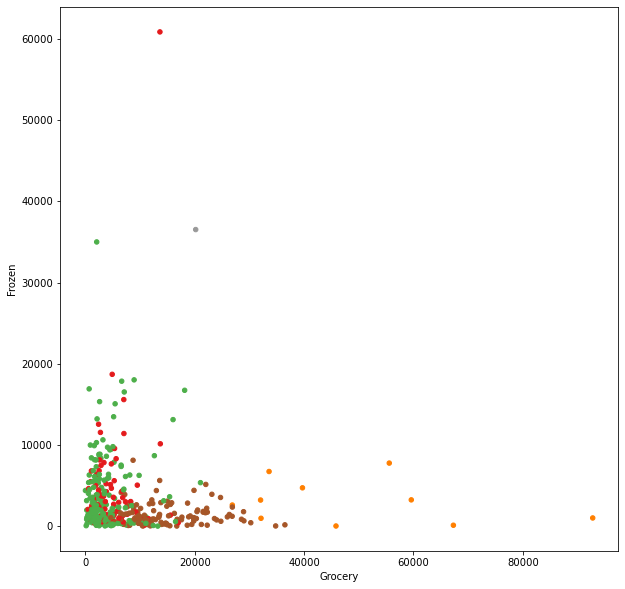

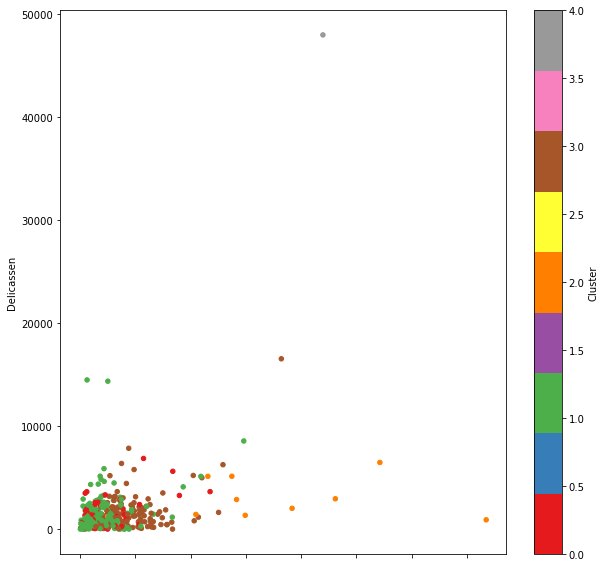

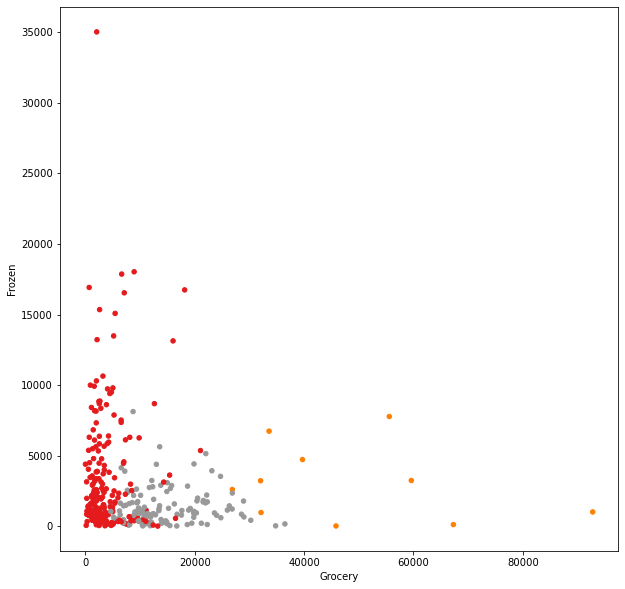

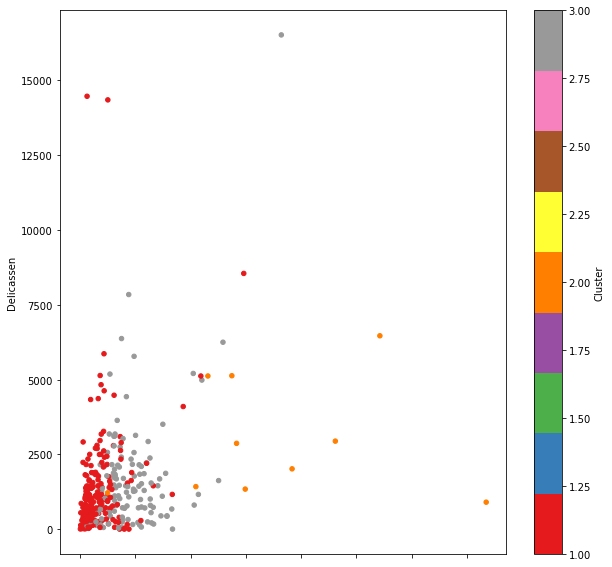

In [39]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')


'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')


'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()


In [48]:
# -*- coding: utf-8 -*-

# 기본 라이브러리 불러오기
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
         'town_C', 'town_Q', 'town_S']]  # 독립 변수 X
y = ndf['survived']  # 종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기

# 모형 객체 생성 (kernel='rbf' 적용)
#svm_model = svm.SVC(kernel='rbf')
svm_model = svm.SVC(kernel='rbf', C=20, gamma = 0.01)
# 적절한 매개변수 C값과 gamma 값을 찾는게 중요
# C가 너무 크면 훈련데이터는 잘 분류하지만 오버피팅 발생
# gamma 매개변수는 결정경계의 곡률을 조정/ gamma가 너무 크면 훈련데이터는 잘 분류하지만 오버피팅 발생

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[0 0 1 0 1 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[114  11]
 [ 29  61]]


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       125
           1       0.85      0.68      0.75        90

    accuracy                           0.81       215
   macro avg       0.82      0.79      0.80       215
weighted avg       0.82      0.81      0.81       215



In [ ]:
# -*- coding: utf-8 -*-

# 기본 라이브러리 불러오기
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
         'town_C', 'town_Q', 'town_S']]  # 독립 변수 X
y = ndf['survived']  # 종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기

# 모형 객체 생성 (kernel='rbf' 적용)
#svm_model = svm.SVC(kernel='rbf')
svm_model = svm.SVC(kernel='rbf', C=20, gamma = 0.01)
# 적절한 매개변수 C값과 gamma 값을 찾는게 중요
# C가 너무 크면 훈련데이터는 잘 분류하지만 오버피팅 발생
# gamma 매개변수는 결정경계의 곡률을 조정/ gamma가 너무 크면 훈련데이터는 잘 분류하지만 오버피팅 발생

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

In [49]:

# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
'''

[Step 1] 데이터 준비/ 기본 설정

'''
# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(uci_path, header=None)

# 열 이름 지정 
# 컬럼 설명 : 유방 종양의 크기와 거칠기 등에 대한 전자수치 정보
df.columns = [
    'id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
    'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class'
]

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

'''

[Step 2] 데이터 탐색

'''

# 데이터 살펴보기
print(df.head())
print('\n')

# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# bare_nuclei 열만 문자열
# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
print(df['bare_nuclei'].unique())  # bare_nuclei 열의 고유값 확인
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)  # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)  # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')  # 문자열을 정수형으로 변환
print(df.info())  # 데이터 자료형 확인
print('\n')
'''

[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

'''
# id 컬럼은 불필요 제외. 
# 속성(변수) 선택
X = df[[
    'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial', 'bare_nuclei',
    'chromatin', 'normal_nucleoli', 'mitoses'
]]  #설명 변수 X
y = df['class']  #예측 변수 Y

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(pd.DataFrame(X).describe())
print('\n')


# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기

# 모형 객체 생성 (kernel='rbf' 적용)
#svm_model = svm.SVC(kernel='rbf')
svm_model = svm.SVC(kernel='rbf', C=20, gamma = 0.01)
# 적절한 매개변수 C값과 gamma 값을 찾는게 중요
# C가 너무 크면 훈련데이터는 잘 분류하지만 오버피팅 발생
# gamma 매개변수는 결정경계의 곡률을 조정/ gamma가 너무 크면 훈련데이터는 잘 분류하지만 오버피팅 발생

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl